In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [ ]:
#loading the dataset
mnist = keras.datasets.mnist

In [ ]:
#getting the training and testing dataset
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
#checking the length and shape of our training and testing datasets
print('length of X_train:',len(X_train))
print('length of X_test:',len(X_test))
print('shape of X_train:',X_train.shape)
print('shape of y_train:',y_train.shape)


length of X_train: 60000
length of X_test: 10000
shape of X_train: (60000, 28, 28)
shape of y_train: (60000,)


In [ ]:
#printing the y_train
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
#printing y_train
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

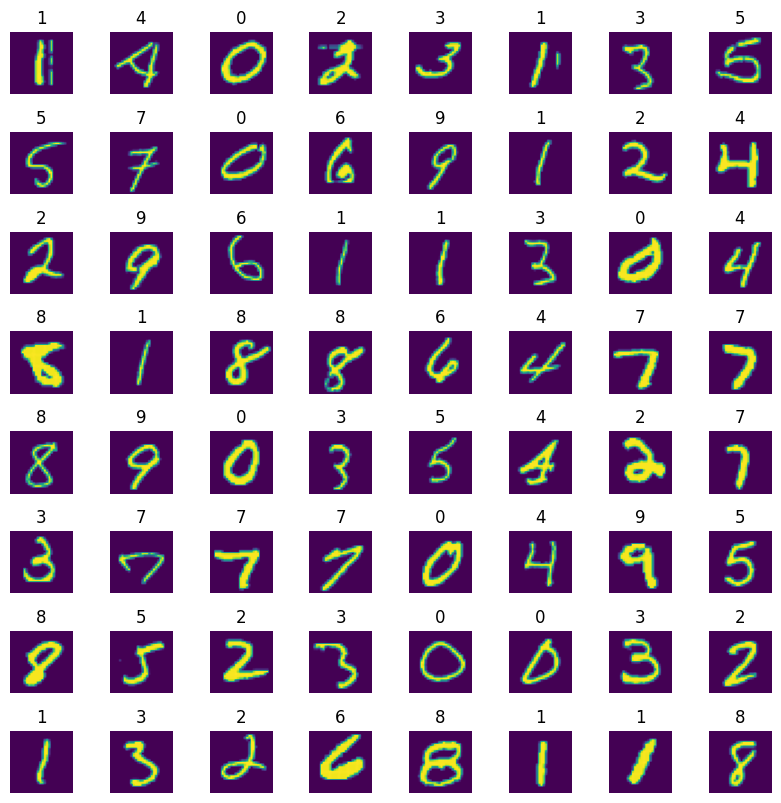

In [ ]:
#showing how our dataset
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n, p = X_train.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    ax.imshow(X_train[random_index])
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [ ]:
#checking the number of categories
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


In [ ]:
#importing necessary libraries for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D, Flatten

In [ ]:
#training my model
from keras import backend as k
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
   x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
   x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model = Sequential(
    [
        Input(shape=inpx),
        Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding='valid',activation ='relu'),
        Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding='valid',activation='relu'),
        MaxPooling2D(pool_size = (3,3)),
        Dropout(0.5),
        Flatten(),
        Dense(250, activation = 'sigmoid'),
        Dense(10, activation = 'softmax')
    ]
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(0.001),)



model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.1557
Epoch 2/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0561
Epoch 3/10
1875/1875 [==============================] - 155s 82ms/step - loss: 0.0416
Epoch 4/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0331
Epoch 5/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0265
Epoch 6/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0245
Epoch 7/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0215
Epoch 8/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0171
Epoch 9/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0163
Epoch 10/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0143


In [ ]:
#making predictions
pred = model.predict(X_test)
predictions = []
for i in range(len(y_test)):
  predictions.append(np.argmax(pred[i]))


313/313 [==============================] - 6s 20ms/step


In [ ]:
#clculating accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)

98.8


In [ ]:
#calculating accuracy of the training dataset
pred_train = model.predict(X_train)
predictions_train = []
for i in range(len(y_train)):
  predictions_train.append(np.argmax(pred_train[i]))
print(accuracy_score(y_train,predictions_train)*100)

1875/1875 [==============================] - 43s 23ms/step
99.44833333333334
